In [13]:
import matplotlib.pyplot as plt
from stompy.grid import unstructured_grid 
import xarray as xr
import os, glob
import numpy as np
%matplotlib notebook

In [2]:
ds=xr.open_dataset("hourly-out-v00/surface-20170801T1400.nc")

In [4]:
ds.conc

<xarray.DataArray 'conc' (cell: 57124)>
array([1.189802, 0.578703, 1.640561, ..., 0.748151, 0.006329, 0.004292])
Dimensions without coordinates: cell

In [9]:
# Experiment level configuration -- small, all python native data.
# The 'new' run
cfg=dict(
    ptm_base_dir="/opt2/sfb_ocean/ptm/all_source_022b",
    sun_base_dir="/opt2/sfb_ocean/suntans/runs",
    ptm_output_interval=np.timedelta64(1,'h')
)
cfg['ptm_run_patt']=os.path.join(cfg['ptm_base_dir'],"chunk??","20??????")
cfg['sun_patt']=os.path.join(cfg['sun_base_dir'],"merged_022_20??????")

ptm_run_paths=glob.glob(cfg['ptm_run_patt'])
ptm_run_paths.sort()
cfg['ptm_run_paths']=ptm_run_paths

sun_paths=glob.glob(cfg['sun_patt'])
sun_paths.sort()
cfg['sun_paths']=sun_paths
hydro_path=sun_paths[0]
ptm_ds=xr.open_dataset(os.path.join(hydro_path,"ptm_average.nc_0000.nc"))
grid=unstructured_grid.UnstructuredGrid.read_ugrid(ptm_ds,dialect='fishptm')


INFO:join_features:0 open strings, 25 simple polygons
INFO:join_features:Building index
INFO:join_features:done building index
INFO:join_features:Examining largest poly left with area=38109911619.298943, 24 potential interiors


<IPython.core.display.Javascript object>


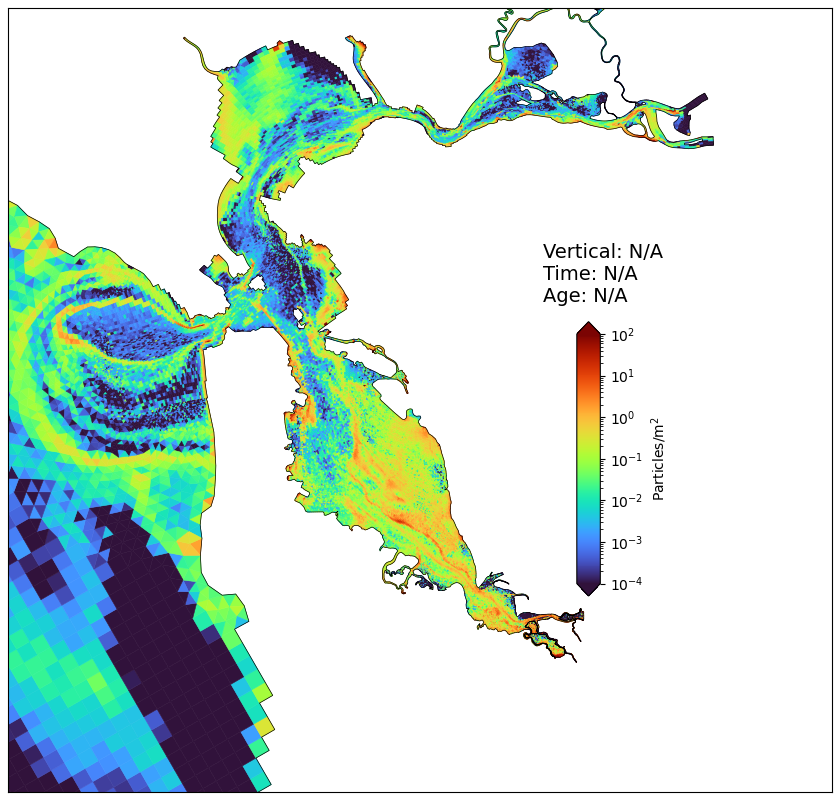

In [14]:
import conc_figure

conc_figure.BayConcFigure(ds,grid=grid)


In [15]:
ds

<xarray.Dataset>
Dimensions:  (cell: 57124)
Dimensions without coordinates: cell
Data variables:
    conc     (cell) float64 1.19 0.5787 1.641 2.586 ... 0.7482 0.006329 0.004292